In [371]:
from bs4 import BeautifulSoup
import easygui as gui
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.plotly as py
from plotly.graph_objs import *
%matplotlib notebook

In [45]:
filepath='/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/people.csv'
# filepath=gui.fileopenbox()

In [136]:
df=pd.read_csv(filepath)
dfURL=pd.read_csv('linkList.csv')

df['username']=df['E-mail'].str.split('@').str[0]
df['uName']=dfURL.name
df['url']=dfURL.url
df

,Sl. No.,Name,E-mail,Designation,Institute,Extension,Group,Picture,Unnamed: 8,username
0,1,Achyuth Acharya,aacharya@ccamp.res.in,Technology Assistant,C-CAMP,6001,Staff Contract Staff,\n \n,NaN,aacharya
1,2,Aparna Agarwal,aagarwal@ncbs.res.in,RESEARCH SCHOLAR (INT PHD),NCBS,6515,Academic Research Scholars Integrated PhD 2012...,\n \n,NaN,aagarwal
2,3,Aalok J Varma,aalokjv@ncbs.res.in,RESEARCH SCHOLAR (Int Phd),NCBS,6515,Academic Research Scholars Integrated PhD 2015...,\n \n,NaN,aalokjv
3,4,Aanchal J Bhatia,aanchalb@ncbs.res.in,RESEARCH SCHOLAR (INT PHD),NCBS,6520,Academic Research Scholars Integrated PhD 2012...,\n \n,NaN,aanchalb
4,5,Aarshiya Rai,aarshiyarai@instem.res.in,TRAINEE,inStem,6803,Academic Intern Dr. Muralidhara Padigaru,\n \n,NaN,aarshiyarai
5,6,Ashaq Hussain Najar,aashiqh@ncbs.res.in,JUNIOR RESEARCH FELLOW,NCBS,6051,Academic Junior Research Fellow Dr. Mitradas M...,\n \n,NaN,aashiqh
6,7,Aastha Kumari,aasthak@ncbs.res.in,RESEARCH SCHOLAR (INT PHD),NCBS,6605,Academic Research Scholars Integrated PhD 2014...,\n \n,NaN,aasthak
7,8,Abhik Dutta,abhikd@instem.res.in,Intern,inStem,6703,Academic Dr. Colin Jamora,\n \n,NaN,abhikd
8,9,Abhinav Tyagi,abhinavt@ncbs.res.in,JUNIOR RESEARCH FELLOW,NCBS,6031,Academic Junior Research Fellow Dr. Uma Ramakr...,\n \n,NaN,abhinavt
9,10,Abhinav Yadav,abhinavy@ncbs.res.in,Junior Research Fellow,NCBS,6509,Academic Junior Research Fellow Dr. Axel Brock...,\n \n,NaN,abhinavy


In [149]:
#gender scraper

gender=[]
gnl=[]
i=0
for url in df.url:

    req = requests.get(url)
    soup = BeautifulSoup(req.text, "lxml")
    try:
        g=soup.find('div',attrs={'class':'field field-name-field-personal-title field-type-list-text field-label-above'}).find('div',attrs={'field-items'}).text
        gender.append(g)
    except AttributeError:
        print ('error in'),user
        gender.append('na')
        
    print df.Name[i],g
    gnl.append([df.Name[i],g])
    i+=1
        
df['gender']=gender
df.gender.replace('na', np.nan,inplace=True)
df.to_csv('peopleWithGender.csv')
df

Achyuth Acharya Mr.
Aparna Agarwal Ms.
Aalok J Varma Mr.
Aanchal J Bhatia Ms.
Aarshiya Rai Ms.
Ashaq Hussain Najar Mr.
Aastha Kumari Ms.
Abhik Dutta Mr.
Abhinav Tyagi Mr.
Abhinav Yadav Mr.
Abhirup Khara Mr.
Abhishek Gopal Mr.
Abhishek Mohanty Dr.
Abhishek Pethe Mr.
Abhishek sharma Mr.
Abinaya Sundari T Ms.
Abin V C Ghosh Mr.
Abrar Ahmed Bhat Mr.
Adhish Walvekar Dr.
Adikesavan S G Mr.
Aditi Bhattacharya Dr.
Aditi Mishra Mr.
Aditya Asopa Mr.
Aditya Banerjee Mr.
Aditya Deshpande Mr.
Divya A Ms.
A DoraBabu Mr.
Joshi GOVIND Govind Mr.
Farhan Ali Mr.
Afroze Chimthanawala Ms.
Agnish Dev Prusty Mr.
Aiman Kayenaat Mrs.
Aishanya Sarma Mr.
Aishwarya Bhosale Ms.
Ajay Kumar Mr.
Ajith Kumar Dr.
Ajit Varki Prof.
Ajoy Aloysius Mr.
Akash Gulyani Dr.
Akhil Sharan Panicker Mr.
Akshara Dubey Ms.
Akshay Bhatt Mr.
Akshay Kumar Das Adhikari Dr.
Akshay M Hegde Mr.
Akshay N Mr.
Akshit Goyal Mr.
Alex Johny Mr.
Alhad  Ashok Ketkar Dr.
Ali Asgar Bohra Mr.
Alkesh NA Yadav Mr.
Allwyn V R Mr.
ALOK BHAISARE Mr.
Alok 

,Sl. No.,Name,E-mail,Designation,Institute,Extension,Group,Picture,Unnamed: 8,username,uName,url,gender
0,1,Achyuth Acharya,aacharya@ccamp.res.in,Technology Assistant,C-CAMP,6001,Staff Contract Staff,\n \n,NaN,aacharya,Achyuth Acharya,https://intranet.ncbs.res.in/user/3263,Mr.
1,2,Aparna Agarwal,aagarwal@ncbs.res.in,RESEARCH SCHOLAR (INT PHD),NCBS,6515,Academic Research Scholars Integrated PhD 2012...,\n \n,NaN,aagarwal,Aparna Agarwal,https://intranet.ncbs.res.in/user/284,Ms.
2,3,Aalok J Varma,aalokjv@ncbs.res.in,RESEARCH SCHOLAR (Int Phd),NCBS,6515,Academic Research Scholars Integrated PhD 2015...,\n \n,NaN,aalokjv,Aalok J Varma,https://intranet.ncbs.res.in/user/286,Mr.
3,4,Aanchal J Bhatia,aanchalb@ncbs.res.in,RESEARCH SCHOLAR (INT PHD),NCBS,6520,Academic Research Scholars Integrated PhD 2012...,\n \n,NaN,aanchalb,Aanchal J Bhatia,https://intranet.ncbs.res.in/user/229,Ms.
4,5,Aarshiya Rai,aarshiyarai@instem.res.in,TRAINEE,inStem,6803,Academic Intern Dr. Muralidhara Padigaru,\n \n,NaN,aarshiyarai,Aarshiya Rai,https://intranet.ncbs.res.in/user/3513,Ms.
5,6,Ashaq Hussain Najar,aashiqh@ncbs.res.in,JUNIOR RESEARCH FELLOW,NCBS,6051,Academic Junior Research Fellow Dr. Mitradas M...,\n \n,NaN,aashiqh,Ashaq Hussain Najar,https://intranet.ncbs.res.in/user/288,Mr.
6,7,Aastha Kumari,aasthak@ncbs.res.in,RESEARCH SCHOLAR (INT PHD),NCBS,6605,Academic Research Scholars Integrated PhD 2014...,\n \n,NaN,aasthak,Aastha Kumari,https://intranet.ncbs.res.in/user/289,Ms.
7,8,Abhik Dutta,abhikd@instem.res.in,Intern,inStem,6703,Academic Dr. Colin Jamora,\n \n,NaN,abhikd,Abhik Dutta,https://intranet.ncbs.res.in/user/1646,Mr.
8,9,Abhinav Tyagi,abhinavt@ncbs.res.in,JUNIOR RESEARCH FELLOW,NCBS,6031,Academic Junior Research Fellow Dr. Uma Ramakr...,\n \n,NaN,abhinavt,Abhinav Tyagi,https://intranet.ncbs.res.in/user/292,Mr.
9,10,Abhinav Yadav,abhinavy@ncbs.res.in,Junior Research Fellow,NCBS,6509,Academic Junior Research Fellow Dr. Axel Brock...,\n \n,NaN,abhinavy,Abhinav Yadav,https://intranet.ncbs.res.in/user/1374,Mr.


In [63]:
##scarepe using username, fails a lot
# gender=[]
# for user in df.username:
#     url='https://intranet.ncbs.res.in/users/'+user
 
#     req = requests.get(url)
#     soup = BeautifulSoup(req.text, "lxml")
#     try:
#         g=soup.find('div',attrs={'class':'field field-name-field-personal-title field-type-list-text field-label-above'}).find('div',attrs={'field-items'}).text
#         gender.append(g)
#     except AttributeError:
#         print ('error in'),user
#         gender.append('na')
        
# df['gender']=gender
# df.gender.replace('na', np.nan,inplace=True)
# df

error in aanchalb
error in akashg
error in allwyn
error in ambilid
error in anald
error in anithaks
error in anjana
error in anjulys
error in arati
error in arindamd
error in arjung
error in arunamc
error in arunv
error in ashok
error in ashokv
error in aswin
error in avinashdc
error in awadhesh
error in axel
error in basavaraja
error in bhalla
error in bhavyas
error in bhoomikas
error in chetans
error in colinj
error in cpani
error in dagashe
error in darshikav
error in dasaradhip
error in deanishma
error in devakumar
error in dhan
error in dipikaj
error in divyakv
error in dnotani
error in dtrivedi
error in gaiti
error in gayathrik
error in harleenk
error in hemants
error in hiyaa
error in indubala
error in jaiprakash
error in jalihal
error in jayant
error in jratnam
error in kamalakar
error in kamalammak
error in karthikag
error in krishnat
error in krushnamegh
error in ksvishal
error in lpriya
error in madan
error in madhavis
error in mahesh
error in maithly
error in manasabp
error

In [444]:
df=pd.read_csv('peopleWithGender_.csv')

In [650]:
df.Institute.replace('ccamp','C-CAMP',inplace=True)


df['gender_']=df.gender.replace('Mrs.', 'Female')
df.gender_.replace('Mr.','Male',inplace=True)
df.gender_.replace('Ms.','Female',inplace=True)
df.gender_.replace('m','Male',inplace=True)
df.gender_.replace('f','Female',inplace=True)

# df.gender_.replace('Dr.',np.nan,inplace=True)
# df.gender_.replace('Prof.',np.nan,inplace=True)
# df.gender.dropna()


def f(x):
    if ('Postdocs' in x['Group']): return 'Postdocs'
    elif ('Academic' in x['Group']): return 'Student'
    elif ('Staff' in x['Group']): return 'Staff'
    elif ('Faculty' in x['Group']): return 'Faculty'
    else: return 0

df['position']= (df.apply(lambda x: f(x), axis=1))



facL=df[df['Group'].map(lambda tags: 'Faculty' in tags)].Name
facL2=facL.str.split(' ').str[0]
def f2(x):
    for fac in facL2:
        if fac in x['Group']:
            return fac

df['Lab']=(df.apply(lambda x: f2(x), axis=1))


df

,Unnamed: 0,Sl. No.,Name,E-mail,Designation,Institute,Extension,Group,Picture,Unnamed: 8,username,uName,url,gender,gender_,position,Lab,batch
0,74,75,Anil Prabhakar,anilpr@ncbs.res.in,PROFESSOR,inStem,6261,Academic,\n \n,m,anilpr,Anil Prabhakar,https://intranet.ncbs.res.in/user/1381,m,Male,Student,None,NaN
1,20,21,Aditi Bhattacharya,aditi@instem.res.in,SCIENTIST - E/ READER,inStem,6812,Academic CBDR Prof. Sumantra Chattarji,\n \n,f,aditi,Aditi Bhattacharya,https://intranet.ncbs.res.in/user/1652,f,Female,Student,Sumantra,NaN
2,73,74,Aneesh Goyal,aneeshg@instem.res.in,Staff Scientist 'F',inStem,6803,Academic CCBT Prof. Ashok Venkitaraman,\n \n,m,aneeshg,Aneesh Goyal,https://intranet.ncbs.res.in/user/1669,m,Male,Student,Ashok,NaN
3,853,854,Sridhar Neelamraju,sridharn@ncbs.res.in,NCBS-INSTEM-Cambridge Fellow,NCBS,6161,Academic Dr. Shachi Gosavi,\n \n,m,sridharn,Sridhar Neelamraju,https://intranet.ncbs.res.in/user/2474,m,Male,Student,Shachi,NaN
4,970,971,Vardhan NA Patankar,vardhanp@ncbs.res.in,DST INSPIRE FELLOW,NCBS,6414,Academic MSc Wildlife,\n \n,m,vardhanp,Vardhan NA Patankar,https://intranet.ncbs.res.in/user/1318,m,Male,Student,None,NaN
5,620,621,RAHUL RAINA,rahulraina@ncbs.res.in,POST DOCTORAL FELLOW,NCBS,6116,Academic Postdocs,NaN,m,rahulraina,RAHUL RAINA,https://intranet.ncbs.res.in/user/3466,m,Male,Postdocs,None,NaN
6,940,941,Tejas M Gupte,tejas@instem.res.in,POST DOCTORAL FELLOW,inStem,6607,Academic Postdocs,\n \n,m,tejas,Tejas M Gupte,https://intranet.ncbs.res.in/user/1930,m,Male,Postdocs,None,NaN
7,920,921,SWATHY B,swathyb@instem.res.in,POST DOCTORAL FELLOW,inStem,6181,Academic Postdocs 2017 Batch Dr. Raghu Padinjat,\n \n,f,swathyb,SWATHY B,https://intranet.ncbs.res.in/user/3393,f,Female,Postdocs,Raghu,17
8,826,827,Shailesh Tripathi,sktripathi@ncbs.res.in,POST DOCTORAL FELLOW,NCBS,6106,Academic Postdocs 2017 Batch Dr. Shachi Gosavi,NaN,m,sktripathi,Shailesh Tripathi,https://intranet.ncbs.res.in/user/3397,m,Male,Postdocs,Shachi,17
9,454,455,Mihika Bose,mihikab@instem.res.in,POST DOCTORAL FELLOW,inStem,6813,Academic Postdocs CBDR,\n \n,f,mihikab,Mihika Bose,https://intranet.ncbs.res.in/user/3553,f,Female,Postdocs,None,NaN


In [447]:
dfStudent=df[df['Group'].map(lambda tags: 'Academic' in tags)]
dfFaculty=df[df['Group'].map(lambda tags: 'Faculty' in tags)]
dfStaff=df[df['Group'].map(lambda tags: 'Staff' in tags)]

In [448]:
agg=df.groupby(['position','gender_']).count()['Name'].unstack()
agg['ratio']=(1000*pd.to_numeric(agg['Female'])/agg['Male']).astype(int)
agg

gender_,Female,Male,ratio
position,,,
Faculty,16,35,457
Postdocs,75,90,833
Staff,111,145,765
Student,270,290,931


In [701]:
sns.set_style("ticks")
order=['Student','Postdocs','Faculty','Staff']
g=sns.countplot(hue='gender_',x='position',data=df,order=order,saturation=0.6)

i=0
for p in g.patches:
    if (i<len(g.patches)/2):
        height = p.get_height()
        g.text(i, height+5, agg.ratio[order[i]], horizontalalignment='left', size='medium', color='grey', )
        i+=1

g.legend_.set_title('Gender')
g.set_ylabel("",fontsize=20)
g.set_xlabel("Position",fontsize=14)
g.set_title('Women for every 1000 Men @ BLiSc',fontsize=18)
sns.despine(offset=10, trim=True)
plt.tight_layout()
plt.savefig('womenPos.png',dpi=300)
plt.show()

IndexError: list index out of range

In [337]:
agg2=df.groupby(['Institute','gender_']).count()['Name'].unstack()
agg2['ratio']=(1000*pd.to_numeric(agg2['Female'])/agg2['Male']).astype(int)
agg2

gender_,Female,Male,ratio
Institute,,,
C-CAMP,24,20,1200
NCBS,319,400,797
inStem,129,138,934


<IPython.core.display.Javascript object>


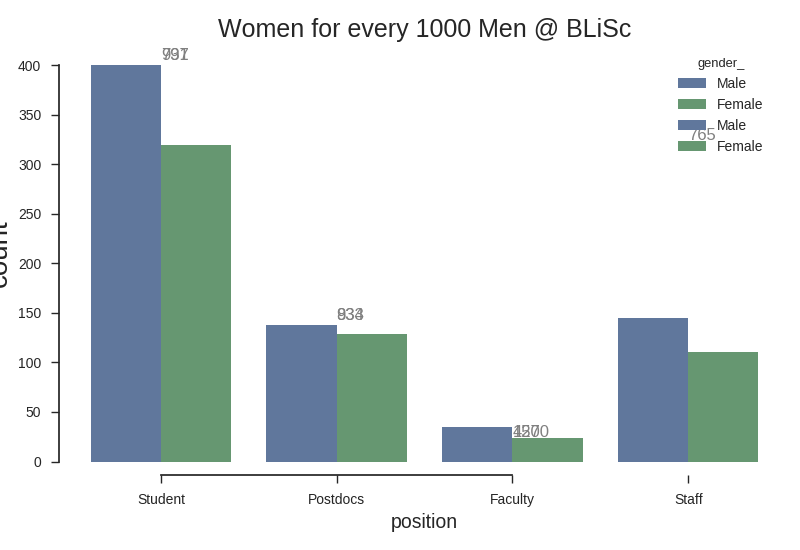

In [342]:
sns.set_style("ticks")
order2=['NCBS','inStem','C-CAMP']
g2=sns.countplot(hue='gender_',x='Institute',order=order2,data=df,saturation=0.6)

i=0
for p in g2.patches:
    if (i<len(g2.patches)/2):
        height = p.get_height()
        g2.text(i, height+5, agg2.ratio[order2[i]], horizontalalignment='left', size='medium', color='grey', )
        i+=1

g2.legend_.set_title('Gender')
g2.set_ylabel("",fontsize=20)
g2.set_xlabel("Institute",fontsize=14)
g2.set_title('Women for every 1000 Men @ BLiSc',fontsize=18)
sns.despine(offset=10, trim=True)
plt.tight_layout()
plt.savefig('womenInstitute.png',dpi=300)

In [402]:
df[df.Lab=='Shannon']

,Unnamed: 0,Sl. No.,Name,E-mail,Designation,Institute,Extension,Group,Picture,Unnamed: 8,username,uName,url,gender,gender_,position,Lab
175,117,118,Abhinav Raina,araina@ncbs.res.in,JUNIOR RESEARCH FELLOW,NCBS,6211,Academic Dr. Shannon Olsson,NaN,NaN,araina,Abhinav Raina,https://intranet.ncbs.res.in/user/3480,Mr.,Male,Student,Shannon
238,724,725,Santosh Rajus,santoshr@ncbs.res.in,Junior Research Fellow,NCBS,6211,Academic Junior Research Fellow Dr. Shannon Ol...,\n \n,NaN,santoshr,Santosh Rajus,https://intranet.ncbs.res.in/user/1082,Mr.,Male,Student,Shannon
376,551,552,Pavan Kumar Kaushik,pavankk@ncbs.res.in,RESEARCH SCHOLAR (INT PHD),NCBS,6211,Academic Research Scholars Integrated PhD 2014...,\n \n,NaN,pavankk,Pavan Kumar Kaushik,https://intranet.ncbs.res.in/user/912,Mr.,Male,Student,Shannon
430,21,22,Aditi Mishra,aditim@ncbs.res.in,RESEARCH SCHOLAR (PHD),NCBS,6211,Academic Research Scholars PhD 2016 Batch Dr. ...,\n \n,NaN,aditim,Aditi Mishra,https://intranet.ncbs.res.in/user/2077,Mr.,Male,Student,Shannon
630,284,285,Geetha G T,geethagt@ncbs.res.in,Post Doctoral Fellow,NCBS,6211,Academic Postdocs Dr. Shannon Olsson,\n \n,NaN,geethagt,Geetha G T,https://intranet.ncbs.res.in/user/2051,Mrs.,Female,Postdocs,Shannon
856,858,859,Sriraksha G B,srirakshagb@ncbs.res.in,Junior Research Fellow,NCBS,6211,Academic Research Fellows Junior Research Fell...,\n \n,NaN,srirakshagb,Sriraksha G B,https://intranet.ncbs.res.in/user/1210,Ms.,Female,Student,Shannon
930,861,862,Srishti Batra,srishtib@ncbs.res.in,RESEARCH SCHOLAR,NCBS,6211,Academic Research Scholars PhD 2014 Batch Dr. ...,\n \n,NaN,srishtib,Srishti Batra,https://intranet.ncbs.res.in/user/1214,Ms.,Female,Student,Shannon
956,309,310,Hinal B Kharva,hinalk@ncbs.res.in,Senior Research Fellow,NCBS,6211,Academic Senior Research Fellow 2015 Batch Dr....,\n \n,NaN,hinalk,Hinal B Kharva,https://intranet.ncbs.res.in/user/634,Ms.,Female,Student,Shannon


In [589]:
agg3=df.groupby(['Lab','gender_']).count()['Name'].unstack()
agg3=agg3.dropna()
agg3['ratio']=(100*pd.to_numeric(agg3['Female'])/agg3['Male']).astype(int)
agg3=agg3.sort('ratio',axis=0)
agg3['labSize']=agg3.Female+agg3.Male
agg3['name']=agg3.index
def f2(x):
    return (dfFaculty[dfFaculty.sName==x].gender.iloc[0])
agg3['LabG']=agg3.name.apply(lambda x: f2(x))
agg3['Findex']=(agg3.Female-agg3.Male)/agg3.labSize
agg3

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



gender_,Female,Male,ratio,labSize,name,LabG,Findex
Lab,,,,,,,
Shachi,1.0,5.0,20,6.0,Shachi,f,-0.666667
Shashi,4.0,12.0,33,16.0,Shashi,m,-0.500000
Ashok,1.0,3.0,33,4.0,Ashok,m,-0.500000
Dhandapany,2.0,5.0,40,7.0,Dhandapany,m,-0.428571
Dimple,3.0,6.0,50,9.0,Dimple,f,-0.333333
Mathew,3.0,6.0,50,9.0,Mathew,m,-0.333333
Akash,4.0,8.0,50,12.0,Akash,m,-0.333333
Panicker,2.0,4.0,50,6.0,Panicker,m,-0.333333
Sanjay,7.0,13.0,53,20.0,Sanjay,m,-0.300000


<IPython.core.display.Javascript object>


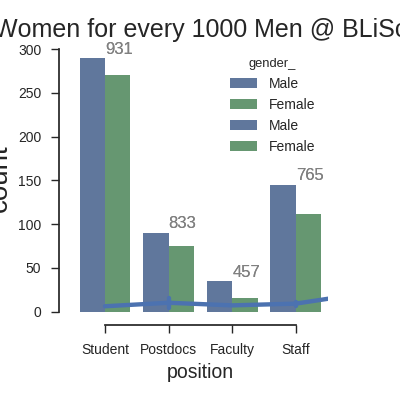

In [428]:
sns.factorplot(x='ratio',y='size',data=agg3)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning:

using '+' to provide set union with Indexes is deprecated, use '|' or .union()



In [547]:
agg3

gender_,Female,Male,ratio,labSize,Findex
Lab,,,,,
Shachi,1.0,5.0,20,6.0,-0.666667
Shashi,4.0,12.0,33,16.0,-0.500000
Ashok,1.0,3.0,33,4.0,-0.500000
Dhandapany,2.0,5.0,40,7.0,-0.428571
Dimple,3.0,6.0,50,9.0,-0.333333
Mathew,3.0,6.0,50,9.0,-0.333333
Akash,4.0,8.0,50,12.0,-0.333333
Panicker,2.0,4.0,50,6.0,-0.333333
Sanjay,7.0,13.0,53,20.0,-0.300000


In [549]:
agg3.index[0]

'Shachi'

In [557]:
dfFaculty['sName']=dfFaculty.Name.str.split(' ').str[0]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [651]:
df['batch']=df[df.Group.map(lambda tags : 'Batch' in tags)].Group.str.split('20').str[1].str[0:2]
df.groupby(['batch','gender_']).count().Name

Unnamed: 0  Sl. No.  Name  E-mail  Designation  Institute  \
batch gender_                                                              
07    Female            1        1     1       1            1          1   
08    Female            1        1     1       1            1          1   
09    Female            1        1     1       1            1          1   
      Male              1        1     1       1            1          1   
10    Female            2        2     2       2            2          2   
      Male              3        3     3       3            3          3   
11    Female            3        3     3       3            3          3   
      Male              4        4     4       4            4          4   
12    Female           14       14    14      14           14         14   
      Male              9        9     9       9            9          9   
13    Female            9        9     9       9            9          9   
      Male             10       10    10      10           10         10   
14    Female           14       14    14      14           14         14   
      Male             19       19    19      19           19         19   
15    Female           15       15    15      15           15         15   
      Male             16       16    16      16           16         16   
16    Female           15       15    15      15           15         15   
      Male             27       27    27      27           27         27   
17    Female           16       16    16      16           16         16   
      Male             25       25    25      25           25         25   

               Extension  Group  Picture  Unnamed: 8  username  uName  url  \
batch gender_                                                                
07    Female           1      1        1           0         1      1    1   
08    Female           1      1        1           0         1      1    1   
09    Female           1      1        1           0         1      1    1   
      Male             1      1        1           0         1      1    1   
10    Female           2      2        2           0         2      2    2   
      Male             3      3        3           0         3      3    3   
11    Female           3      3        3           0         3      3    3   
      Male             4      4        4           0         4      4    4   
12    Female          14     14       14           0        14     14   14   
      Male             9      9        9           0         9      9    9   
13    Female           9      9        9           0         9      9    9   
      Male            10     10       10           0        10     10   10   
14    Female          14     14       14           0        14     14   14   
      Male            19     19       19           0        19     19   19   
15    Female          15     15       15           0        15     15   15   
      Male            16     16       16           0        16     16   16   
16    Female          15     15       15           0        15     15   15   
      Male            27     27       27           0        27     27   27   
17    Female          16     16       16           1        16     16   16   
      Male            25     25       24           1        25     25   25   

               gender  position  Lab  
batch gender_                         
07    Female        1         1    1  
08    Female        1         1    1  
09    Female        1         1    1  
      Male          1         1    1  
10    Female        2         2    1  
      Male          3         3    1  
11    Female        3         3    3  
      Male          4         4    2  
12    Female       14        14   14  
      Male          9         9    9  
13    Female        9         9    9  
      Male         10        10   10  
14    Female       14        14   13  
      Male         19        19   16  
1

In [634]:
import matplotlib
from matplotlib import cm
import numpy as np

magma_cmap = matplotlib.cm.get_cmap('Spectral')

magma_rgb = []
norm = matplotlib.colors.Normalize(vmin=0, vmax=255)

for i in range(0, 255):
       k = matplotlib.colors.colorConverter.to_rgb(magma_cmap(norm(i)))
       magma_rgb.append(k)
    
    
def matplotlib_to_plotly(cmap, pl_entries):
    h = 1.0/(pl_entries-1)
    pl_colorscale = []
    
    for k in range(pl_entries):
        C = map(np.uint8, np.array(cmap(k*h)[:3])*255)
        pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])
        
    return pl_colorscale

magma = matplotlib_to_plotly(magma_cmap, 255)

In [702]:
repl=dict(m='red',f='blue')
agg3['labGC']=agg3.LabG.map(repl)

In [714]:

overlay=agg3.index+'  '+agg3.Male.astype(int).astype(str)+'M / '+ \
        agg3.Female.astype(int).astype(str)+'F    ' +agg3.Findex.round(2).astype(str)
trace1 = go.Scatter(
    x = agg3.Male,
    y = agg3.Female,
    mode='markers',
    text= overlay,
    
    #outline
    
    marker=dict(
        size=agg3.labSize*1.32,
        color =agg3.Findex, #set color equal to a variable
        colorscale=magma,
#         colorscale='Viridis',
        
        line = dict(
            width = 3,
            color = agg3.labGC
        ),
        showscale=True,
#         line=dict(width=2),
        cauto = False,
        cmin = -1,
        cmax = 1,
        colorbar = dict(
            title = 'Gender Disparity Index',
            titleside = 'top',
            tickmode = 'array',
            tickvals = [-1,0,1],
            ticktext = ['All Male','Balanced','All Female'],
            ticks = 'outside',
            
        )
    )
)


data = [trace1]
# data = [trace2,trace1]
legS=0.08
x0=0.05
x1=x0+legS
y0=0.9
y1=y0+legS
off=0.1

layout={'shapes': [
        # Line Diagonal
        {
            'type': 'line',
            'x0': 0,
            'y0': 0,
            'x1': 20,
            'y1': 20,
            'line': {
                'color': 'rgba(128, 0, 128,0.3)',
                'width': 4,
                'dash': 'dot',
            },
        },
         {
            'type': 'circle',
            'xref': 'paper',
            'yref': 'paper',
            'x0': x0,
            'y0': y0,
            'x1': x1,
            'y1': y1,
            'line': {
                'color': 'red',
                'width': 3,
            },
            'fillcolor': magma[127][1],
        },
                 {
            'type': 'circle',
            'xref': 'paper',
            'yref': 'paper',
            'x0': x0,
            'y0': y0-off,
            'x1': x1,
            'y1': y1-off,
            'line': {
                'color': 'blue',
                'width': 3,
            },
            'fillcolor': magma[127][1],
        },
        
        ],
        
        'annotations':Annotations([
        Annotation(
            x=x0+legS,
            y=y0,
            showarrow=False,
            text='Female Supervisor',
            xref='paper',
            yref='paper'
        ),
        Annotation(
            x=0.15,
            y=0.85,
            showarrow=False,
            text='Male Supervisor',
            xref='paper',
            yref='paper'
        )
    ]),
       
           'autosize':False,
    'width':800,
    'height':800,
    'dragmode': 'pan',
        'hovermode' : 'closest',
        
        'title':'Gender Disparity across labs',
    'xaxis':dict(
        title='Number of Male labmembers',
         domain = [0, 20],
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='red'
        )
    ),
    'yaxis':dict(
        title='Number of Female labmembers',
      scaleanchor = "x",
      domain = [0, 20],
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='blue'
        )
    )
        
        
       }

        
fig = {
    'data': data,
    'layout': layout,
}
py.iplot(fig, filename='scatter-plot-with-colorscale',)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: FutureWarning:

using '+' to provide set union with Indexes is deprecated, use '|' or .union()



In [368]:
facL=df[df['Group'].map(lambda tags: 'Faculty' in tags)].Name
facL2=facL.str.split(' ').str[0]

def f(x):
    for fac in facL2:
        if (fac in x['Group']): return fac
    
df['Lab']=df.apply(lambda x: f(x), axis=1)